### <center>MLZC Mid-Term project - Q4/2022<img align="right" width="60" height="60" src="../media/heart.png">

# 11 Analyze all columns (features & target)

### source: https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records

In [1]:
import pandas as pda
import numpy as npy

npy.__version__ , pda.__version__

('1.23.4', '1.5.1')

In [2]:
import pickle

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.__version__ 

'0.12.1'

In [4]:
# Reload objet form previous notebooks
strFil = '.\pickle\dfrMid.bin'
with open(strFil, 'rb') as filIn: 
    dfrMid = pickle.load(filIn)
dfrMid.shape

(299, 13)

In [5]:
strFil = '.\pickle\lstCol.bin'
with open(strFil, 'rb') as filIn: 
    lstCol = pickle.load(filIn)
len(lstCol)

13

In [6]:
dfrMid.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
death_event                   int64
dtype: object

In [7]:
# create the list of columns
lstCol = dfrMid.columns.to_list()
lstCol

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'time',
 'death_event']

## basic info on all columns

In [8]:
for col in lstCol:
    print('<'*10 , col , '>'*10)
    
    print(' count:' , dfrMid[col].count())

    if dfrMid[col].isnull().sum() > 0:
        print(' *** nulls:' , dfrMid[col].isnull().sum())
        
    print(' nunique :' , dfrMid[col].nunique() )
        
    if dfrMid[col].nunique() < 9:
        print(' value_counts : ' , dfrMid[col].value_counts().index.to_list(), '\n') 
    else:
        print(' value_counts[:10] : ' , dfrMid[col].value_counts().index.to_list()[:10], '\n')
            
    if dfrMid[col].dtype == 'object':
        pass
        print(' -object-')
    else:
        print(' min     :' , dfrMid[col].min())
        print(' max     :' , dfrMid[col].max())
        print(' mean    :' , dfrMid[col].mean().round(2))
        print(' std     :' , dfrMid[col].std().round(2))
    
    print('\n')

<<<<<<<<<< age >>>>>>>>>>
 count: 299
 nunique : 47
 value_counts[:10] :  [60.0, 50.0, 65.0, 70.0, 45.0, 55.0, 75.0, 53.0, 58.0, 63.0] 

 min     : 40.0
 max     : 95.0
 mean    : 60.83
 std     : 11.89


<<<<<<<<<< anaemia >>>>>>>>>>
 count: 299
 nunique : 2
 value_counts :  [0, 1] 

 min     : 0
 max     : 1
 mean    : 0.43
 std     : 0.5


<<<<<<<<<< creatinine_phosphokinase >>>>>>>>>>
 count: 299
 nunique : 208
 value_counts[:10] :  [582, 66, 129, 231, 69, 68, 84, 115, 59, 60] 

 min     : 23
 max     : 7861
 mean    : 581.84
 std     : 970.29


<<<<<<<<<< diabetes >>>>>>>>>>
 count: 299
 nunique : 2
 value_counts :  [0, 1] 

 min     : 0
 max     : 1
 mean    : 0.42
 std     : 0.49


<<<<<<<<<< ejection_fraction >>>>>>>>>>
 count: 299
 nunique : 17
 value_counts[:10] :  [35, 38, 40, 25, 30, 60, 50, 45, 20, 55] 

 min     : 14
 max     : 80
 mean    : 38.08
 std     : 11.83


<<<<<<<<<< high_blood_pressure >>>>>>>>>>
 count: 299
 nunique : 2
 value_counts :  [0, 1] 

 min     : 0
 

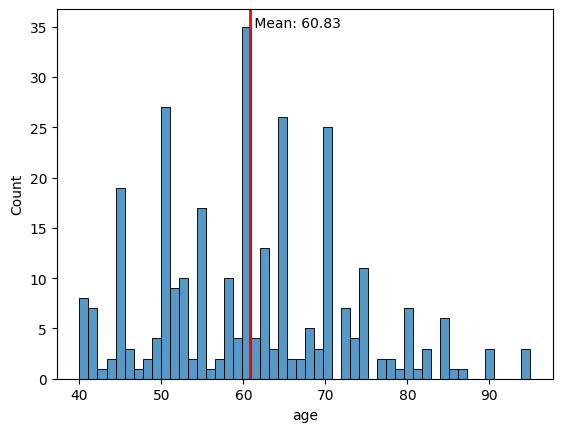

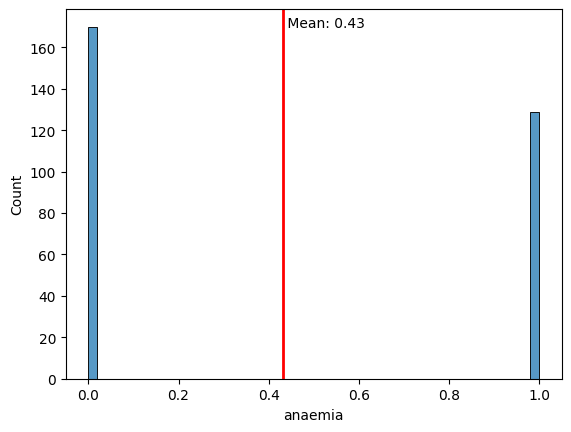

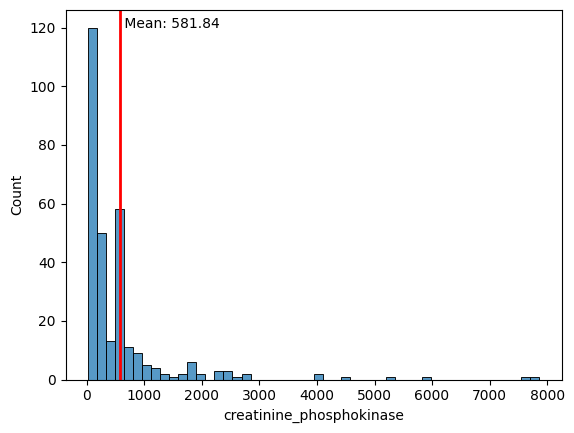

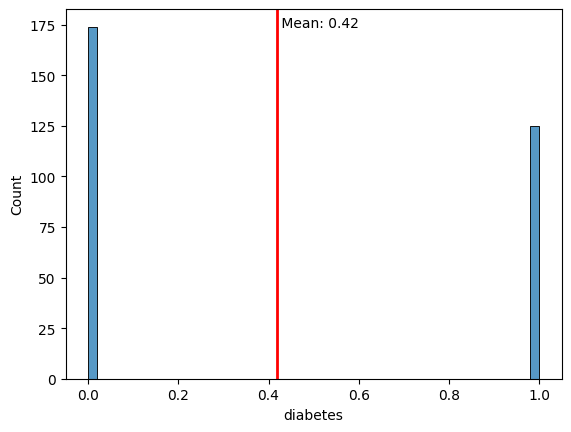

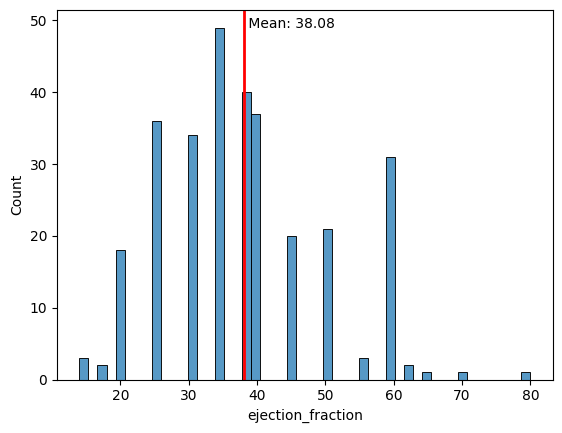

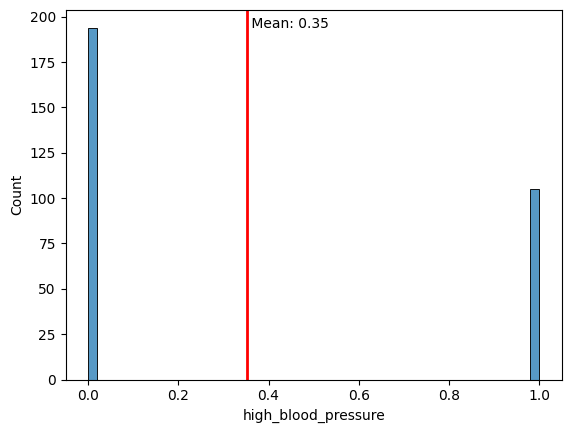

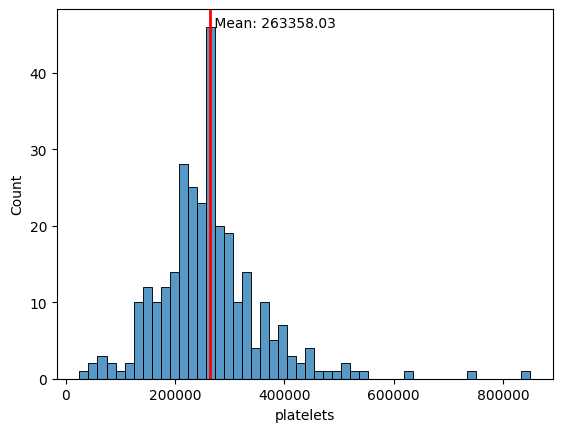

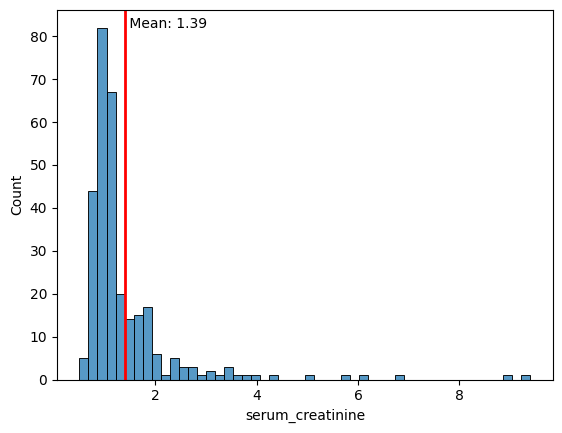

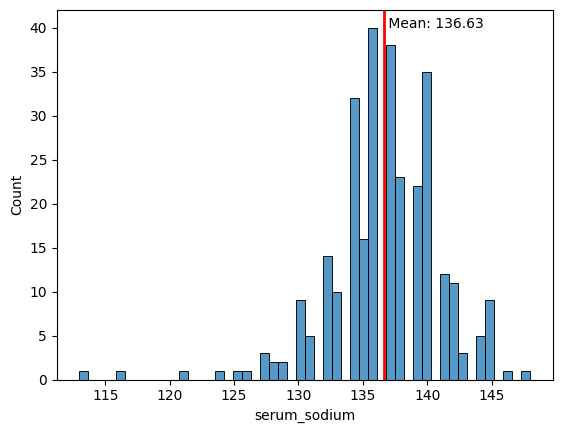

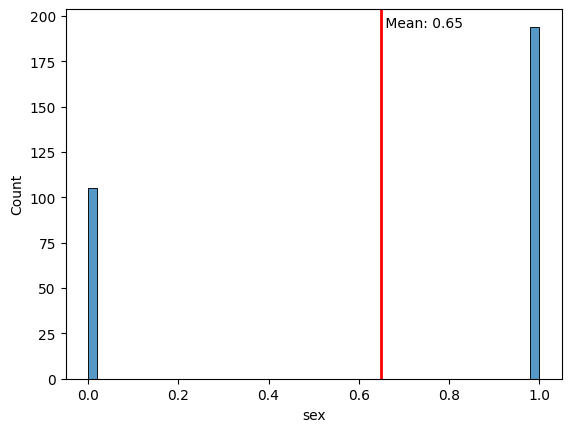

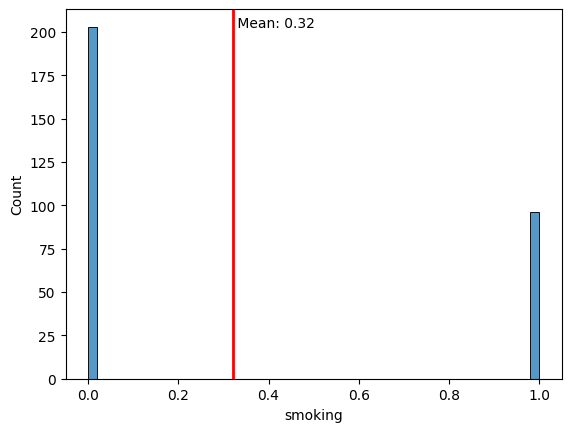

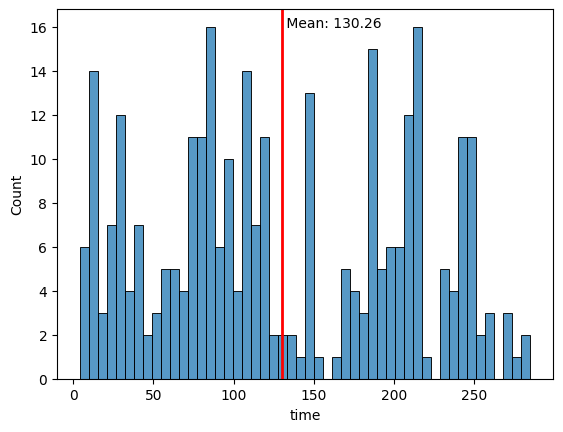

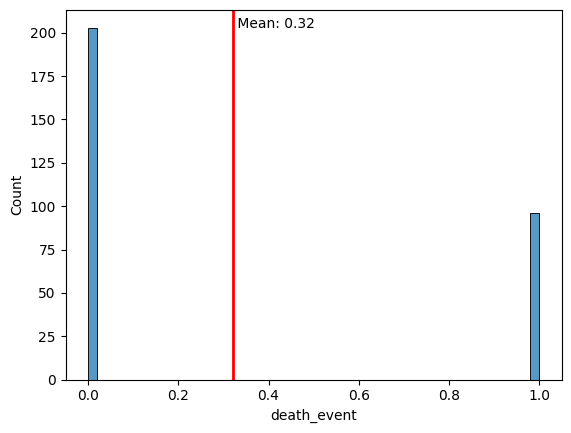

In [9]:
idx = 0
for col in lstCol:
    # if we want to plot only the ones with more than x values
    if dfrMid[col].nunique() > 0:
        
        idx = idx + 1
        plt.figure()
        sns.histplot(dfrMid[col] , bins=50 )
        
        mea = dfrMid[col].mean()
        
        plt.axvline( mea , color='red', linewidth=2)
        
        min_ylim, max_ylim = plt.ylim()
        plt.text(mea * 1 , max_ylim *0.95 , ' Mean: {:.2f}'.format(mea))
        
        plt.plot()

# categorical vs numerical columns?

In [10]:
lstColCat = []
lstColNum = []

for col in lstCol:
    # if less than 9 values probably categorical variable
    if dfrMid[col].nunique() < 9:
        print('Cat: [' , col , '] \n   Values: ' , dfrMid[col].value_counts().index.to_list()  )
        lstColCat.append(col)
    else:
        print('Num: [' , col , '] with nunique=', dfrMid[col].nunique() ,  '\n   First 8:' , dfrMid[col].value_counts().index.to_list()[:8] )
        lstColNum.append(col)
print('_'*40)        
print('lstColCat:' , lstColCat)  
print('lstColNum:' , lstColNum)     

Num: [ age ] with nunique= 47 
   First 8: [60.0, 50.0, 65.0, 70.0, 45.0, 55.0, 75.0, 53.0]
Cat: [ anaemia ] 
   Values:  [0, 1]
Num: [ creatinine_phosphokinase ] with nunique= 208 
   First 8: [582, 66, 129, 231, 69, 68, 84, 115]
Cat: [ diabetes ] 
   Values:  [0, 1]
Num: [ ejection_fraction ] with nunique= 17 
   First 8: [35, 38, 40, 25, 30, 60, 50, 45]
Cat: [ high_blood_pressure ] 
   Values:  [0, 1]
Num: [ platelets ] with nunique= 176 
   First 8: [263358.03, 221000.0, 279000.0, 271000.0, 305000.0, 226000.0, 228000.0, 235000.0]
Num: [ serum_creatinine ] with nunique= 40 
   First 8: [1.0, 1.1, 0.9, 1.2, 0.8, 1.3, 0.7, 1.18]
Num: [ serum_sodium ] with nunique= 27 
   First 8: [136, 137, 140, 134, 138, 139, 135, 132]
Cat: [ sex ] 
   Values:  [1, 0]
Cat: [ smoking ] 
   Values:  [0, 1]
Num: [ time ] with nunique= 148 
   First 8: [250, 187, 10, 186, 107, 30, 209, 244]
Cat: [ death_event ] 
   Values:  [0, 1]
________________________________________
lstColCat: ['anaemia', 'diabetes'

In [13]:
# Prefer keep death_event as a categorical columns because 
# it may be of use as a feature later (if target is changed / not sure ;-) 

#lstColCat.remove('death_event')

## Saving object for next notebooks (\\pickle)

In [14]:
strFil = '.\pickle\lstColCat.bin'
with open(strFil, 'wb') as filOut: 
    pickle.dump(lstColCat, filOut)

In [15]:
strFil = '.\pickle\lstColNum.bin'
with open(strFil, 'wb') as filOut: 
    pickle.dump(lstColNum, filOut)